In [ ]:
import gym
from dqn_agent import DQN_Agent
from agent_handler import Agent_handler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def describe_env(env: gym.Env):
    num_actions = env.action_space.n
    obs = env.observation_space
    num_obs = env.observation_space.shape

    print("Observation space: ", obs)
    print("Observation space size: ", num_obs)
    print("Number of actions: ", num_actions)

    return num_obs, num_actions

In [ ]:
def plot(results, result_index, window_size, title):
  plt.figure(figsize=(25, 10))

  for result in results:
      sns.lineplot(np.convolve(result[result_index], np.ones(window_size) / window_size, mode='same'), label=f"(LR, EF) {(result[3]) }")
      
  plt.title(title)
  plt.legend()
  plt.show()

In [ ]:

env = gym.make('MsPacman-v4')

num_obs, num_actions = describe_env(env)

In [ ]:

dqn_agent = DQN_Agent({
  "num_obs": num_obs,
  "num_actions": num_actions,
  "learning_rate": 0.01,
  "discount_factor": 0.9,
  "exploration_factor": 0.2
})

In [15]:
handler = Agent_handler({
    "num_episodes":50,
    "max_steps":15,
    "notify_percent":10,
    "update_rate": 5
})

In [16]:
results = handler.train([dqn_agent], env)

~~~ Training Agent 1 1/1 ~~~
	Episode 0/50 0%


d:\Source\AI&ML\RL\Reinforcement-Learning\dqn_agent.py:70: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  states, actions, rewards, next_states, dones = np.array(batch).T


	Episode 5/50 10%
	Episode 10/50 20%
	Episode 15/50 30%
	Episode 20/50 40%
	Episode 25/50 50%
	Episode 30/50 60%
	Episode 35/50 70%
	Episode 40/50 80%
	Episode 45/50 90%
	Episode 50/50 100%

Done training!




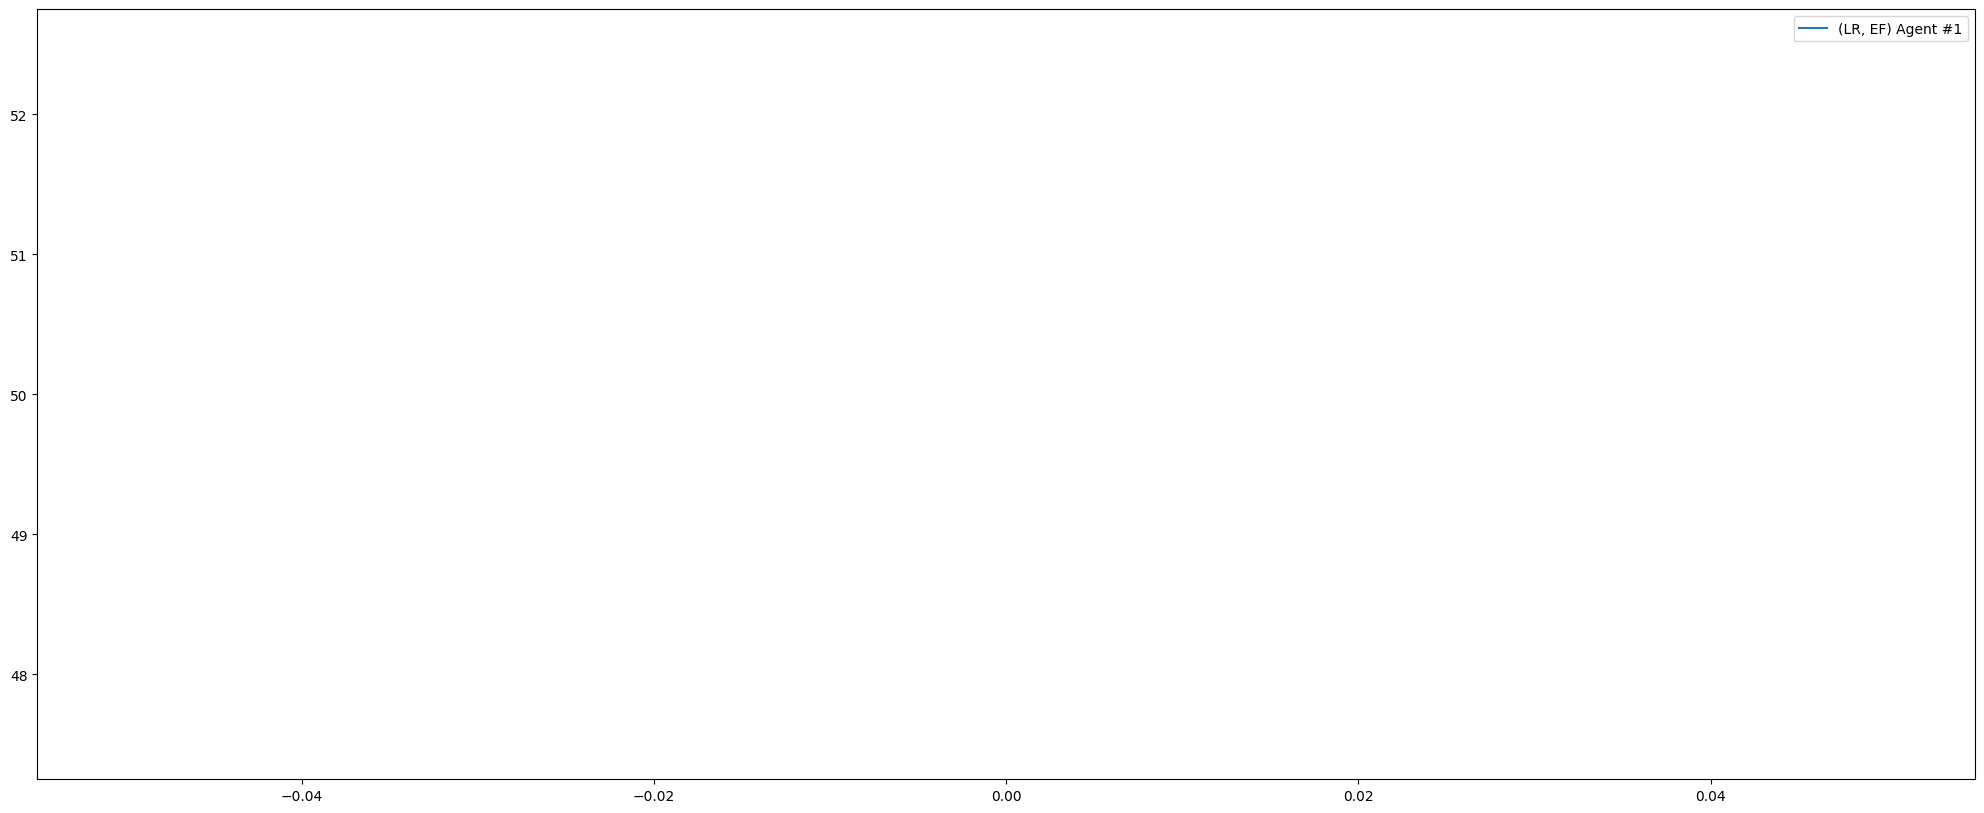

In [20]:
smoothing = 1
plot(results, 0, smoothing, "")